In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('IEA-EV-dataEV_salesCarsHistorical.csv')
data = df.drop(['category', 'parameter', 'mode', 'unit'], axis=1)

# Converting value column to a more usable log.
data['log_value'] = data['value'].apply(lambda x: np.log(x))
df = data

encoded_data = pd.get_dummies(data, columns=['region', 'powertrain'])
x = encoded_data.drop(['log_value', 'value'], axis=1)
y = encoded_data[['log_value']]

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x, y)
linear_prediction = linear_model.predict(x)

# SVR Model
svr_model = SVR(kernel='linear')
svr_model.fit(x, y)
svr_prediction = svr_model.predict(x)

# Reshape predictions to have the same shape
linear_prediction = linear_prediction.reshape(-1)
svr_prediction = svr_prediction.reshape(-1)

linear_prediction = pd.DataFrame(linear_prediction, columns=['log_values'])
svr_prediction = pd.DataFrame(svr_prediction, columns=['log_values'])

linear_prediction['value'] = linear_prediction['log_values'].apply(lambda x: np.exp(x)).astype(int)
svr_prediction['value'] = svr_prediction['log_values'].apply(lambda x: np.exp(x)).astype(int)
linear_prediction
linear_prediction['value'] = linear_prediction['log_values'].apply(lambda x: np.exp(x)).astype(int)
svr_prediction['value'] = svr_prediction['log_values'].apply(lambda x: np.exp(x)).astype(int)
# Hybrid Model: Row-wise Average of Linear Regression and SVR Predictions
hybrid_prediction = np.mean([linear_prediction['value'], svr_prediction['value']], axis=0)




c:\Users\risha\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
# Checking error of the hybrid model with previous values
from sklearn import metrics

# Create DataFrame of predicted values
hybrid_prediction = pd.DataFrame(hybrid_prediction, columns=['value'])

# Converting back to usable values from log_values using exp


# R squared Error
error_score = metrics.r2_score(data['value'], hybrid_prediction['value'])
print("R squared Error:", error_score)
# Calculate RMSE
error_score = np.sqrt(mean_squared_error(data['value'], hybrid_prediction['value']))
print("Root Mean Squared Error (RMSE):", error_score)

R squared Error: 0.853464799078494
Root Mean Squared Error (RMSE): 155796.20045358033


In [5]:
hybrid_prediction

,value
0,70.5
1,118.5
2,73.0
3,123.0
4,200.0
...,...
829,1709935.5
830,2877388.0
831,4755404.5
832,8026379.5


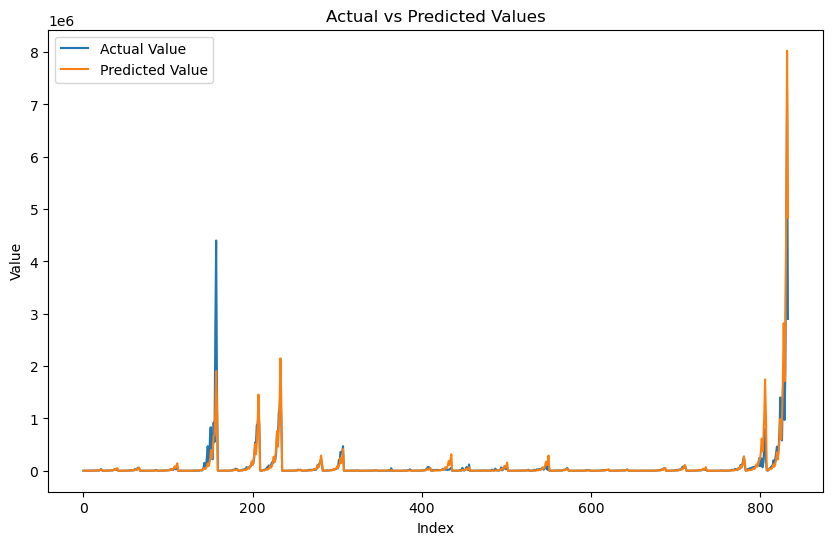

In [6]:
# Plotting the training error
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Actual Value')
plt.plot(data.index, hybrid_prediction['value'], label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [7]:
future_data=pd.DataFrame({'year': [2023,2024,2025],
             'region': ['India','India','India'],
             'powertrain': ['BEV','BEV','BEV']})
future_data
# Perform one-hot encoding on the future data using the original encoder
encoded_future_data = pd.get_dummies(future_data, columns=['region', 'powertrain'])

encoded_future_data = encoded_future_data.reindex(columns=encoded_data.columns[:], fill_value=0)
encoded_future_data
# Remove the 'value' column from the encoded future data
encoded_future_data = encoded_future_data.drop(['value','log_value'], axis=1)
# Predict the values for future years

linear_prediction_future = linear_model.predict(encoded_future_data)


svr_prediction_future = svr_model.predict(encoded_future_data)

# Reshape predictions to have the same shape
linear_prediction_future = linear_prediction_future.reshape(-1)
svr_prediction_future = svr_prediction_future.reshape(-1)

linear_prediction_future = pd.DataFrame(linear_prediction_future, columns=['log_values'])
svr_prediction_future = pd.DataFrame(svr_prediction_future, columns=['log_values'])

linear_prediction_future['value'] = linear_prediction_future['log_values'].apply(lambda x: np.exp(x)).astype(int)
svr_prediction_future['value'] = svr_prediction_future['log_values'].apply(lambda x: np.exp(x)).astype(int)
linear_prediction
linear_prediction_future['value'] = linear_prediction_future['log_values'].apply(lambda x: np.exp(x)).astype(int)
svr_prediction_future['value'] = svr_prediction_future['log_values'].apply(lambda x: np.exp(x)).astype(int)
# Hybrid Model: Row-wise Average of Linear Regression and SVR Predictions
hybrid_prediction_future = np.mean([linear_prediction_future['value'], svr_prediction_future['value']], axis=0).astype(int)

In [8]:
hybrid_prediction_future = pd.DataFrame(hybrid_prediction_future,columns=['value'])
hybrid_prediction_future

,value
0,20615
1,34509
2,57787
